provided a DATASET of ~1.7M records of posts collected from Reddit using Google big query.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data=pd.read_csv("MBTI 500.csv")

In [4]:
data

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


<AxesSubplot:>

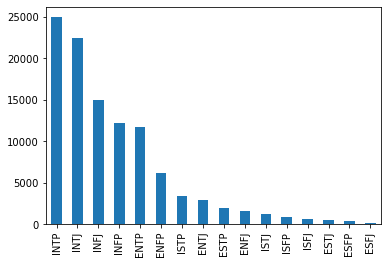

In [5]:
data['type'].value_counts().plot(kind='bar')

In [6]:
data['type'].value_counts() # INTP 24961, ESFJ 181 

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

In [7]:
data['energy']=data['type'].apply(lambda x:x[0])
data['recognize']=data['type'].apply(lambda x:x[1])
data['judgment']=data['type'].apply(lambda x:x[2])
data['plan']=data['type'].apply(lambda x:x[3])

In [8]:
data

,posts,type,energy,recognize,judgment,plan
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J
2,preferably p hd low except wew lad video p min...,INTJ,I,N,T,J
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J
4,space program ah bad deal meing freelance max ...,INTJ,I,N,T,J
...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P
106064,schedule modify hey w intp strong wing underst...,INFP,I,N,F,P
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P


In [9]:
data['energy'].value_counts() # I : 80677, E : 25390
data['recognize'].value_counts() # N : 96866, S : 9201
data['judgment'].value_counts() # T : 69203, F : 36864
data['plan'].value_counts() # P : 61632, J : 44435

# N or S 의 데이터가 10 대1로 비대칭임
# 그다음순으로 I or E가 3대1로 비대칭

P    61632
J    44435
Name: plan, dtype: int64

In [10]:
data['posts length']=data['posts'].apply(lambda x:len(x))

<AxesSubplot:xlabel='posts length', ylabel='Count'>

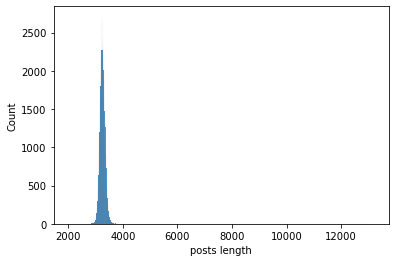

In [11]:
sns.histplot(data['posts length'])

In [12]:
data['voca count']=data['posts'].apply(lambda x:x.split()).apply(lambda x:len(x))

<AxesSubplot:xlabel='voca count', ylabel='Count'>

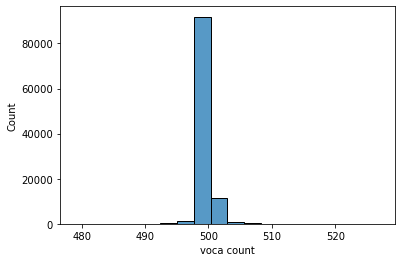

In [13]:
sns.histplot(data['voca count'])

In [14]:
data['voca count'].describe()

count    106067.000000
mean        500.019818
std           1.209997
min         479.000000
25%         500.000000
50%         500.000000
75%         500.000000
max         527.000000
Name: voca count, dtype: float64

In [15]:
# 단어들 토큰화
# 불용어 제거

In [16]:
import nltk
from nltk.corpus import stopwords # 불용어 제거
from nltk.tokenize import word_tokenize # 단어들 토큰화

In [17]:
import re

In [18]:
# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
def delete_shortword(words):
    return shortword.sub('', words)

In [19]:
data['posts']=data['posts'].apply(lambda x : delete_shortword(x))

In [20]:
data['tokenization']=data['posts'].apply(lambda x:word_tokenize(x))

In [ ]:
# 불용어 추가

In [21]:
stop = stopwords.words('english') # 불용어
stop.extend(['intj','entj','istj','estj','infj','enfj','isfj','esfj','intp','entp','istp','estp','infp','enfp','isfp','esfp'])
stop.extend(['smv','iii','ouiiiiiiiiiiiiiiiiiiiiiiiiii','liiiiiike','boiiii'])

In [22]:
data['tokenization'] = data['tokenization'].apply(lambda x: [item for item in x if item not in stop])

In [23]:
data

,posts,type,energy,recognize,judgment,plan,posts length,voca count,tokenization
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,3367,501,"[know, tool, use, interaction, people, excuse,..."
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,3321,501,"[rap, music, ehh, opp, yeah, know, valid, well..."
2,preferably low except wew lad video mind good ...,INTJ,I,N,T,J,3240,501,"[preferably, low, except, wew, lad, video, min..."
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,3257,501,"[drink, like, wish, could, drink, red, wine, g..."
4,space program bad deal meing freelance max see...,INTJ,I,N,T,J,3267,501,"[space, program, bad, deal, meing, freelance, ..."
...,...,...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P,2956,499,"[stay, frustrate, world, life, want, take, lon..."
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P,3291,499,"[fizzle, around, time, mention, sure, mistake,..."
106064,schedule modify hey intp strong wing understan...,INFP,I,N,F,P,3192,499,"[schedule, modify, hey, strong, wing, understa..."
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P,3194,499,"[since, january, busy, schedule, able, spend, ..."


In [49]:
def list2str(words):
    return ' '.join(words)

In [ ]:
data['clean posts'] = data['tokenization'].apply(list2str)

In [53]:
data

,posts,type,energy,recognize,judgment,plan,posts length,voca count,tokenization,clean posts
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,3367,501,"[know, tool, use, interaction, people, excuse,...",know tool use interaction people excuse antiso...
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,3321,501,"[rap, music, ehh, opp, yeah, know, valid, well...",rap music ehh opp yeah know valid well know fa...
2,preferably low except wew lad video mind good ...,INTJ,I,N,T,J,3240,501,"[preferably, low, except, wew, lad, video, min...",preferably low except wew lad video mind good ...
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,3257,501,"[drink, like, wish, could, drink, red, wine, g...",drink like wish could drink red wine give head...
4,space program bad deal meing freelance max see...,INTJ,I,N,T,J,3267,501,"[space, program, bad, deal, meing, freelance, ...",space program bad deal meing freelance max see...
...,...,...,...,...,...,...,...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,I,N,F,P,2956,499,"[stay, frustrate, world, life, want, take, lon...",stay frustrate world life want take long nap w...
106063,fizzle around time mention sure mistake thing ...,INFP,I,N,F,P,3291,499,"[fizzle, around, time, mention, sure, mistake,...",fizzle around time mention sure mistake thing ...
106064,schedule modify hey intp strong wing understan...,INFP,I,N,F,P,3192,499,"[schedule, modify, hey, strong, wing, understa...",schedule modify hey strong wing understand pas...
106065,enfj since january busy schedule able spend li...,INFP,I,N,F,P,3194,499,"[since, january, busy, schedule, able, spend, ...",since january busy schedule able spend little ...


##### MBTI corpus 생성

In [54]:
# corpus_MBTI = []
# for i in range(len(data['tokenization'])):
#     corpus_MBTI.append(data['tokenization'][i])
    
# 2중리스트로 나열

In [58]:
corpus_MBTI = []
for i in range(len(data['clean posts'])):
    corpus_MBTI.append(data['clean posts'][i])

### TFIDF

In [64]:
tfidfv = TfidfVectorizer().fit(corpus_MBTI)
print(tfidfv.transform(corpus_MBTI).toarray())
print(tfidfv.vocabulary_)

MemoryError: Unable to allocate 202. GiB for an array with shape (106067, 255276) and data type float64

In [66]:
tfidfv.transform(corpus_MBTI)

<106067x255276 sparse matrix of type '<class 'numpy.float64'>'
	with 34557935 stored elements in Compressed Sparse Row format>

In [70]:
tfidfv.vocabulary_

{'know': 120164,
 'tool': 225235,
 'use': 236652,
 'interaction': 108694,
 'people': 166083,
 'excuse': 70868,
 'antisocial': 9818,
 'truly': 228143,
 'enlighten': 66225,
 'mastermind': 134568,
 'would': 247984,
 'count': 44366,
 'pet': 167396,
 'peeze': 165558,
 'something': 205602,
 'time': 223751,
 'matter': 134978,
 'either': 63420,
 'whether': 244797,
 'group': 89901,
 'mall': 132714,
 'never': 150327,
 'see': 195752,
 'best': 21909,
 'friend': 80657,
 'sit': 201686,
 'outside': 161094,
 'conversation': 43122,
 'jsut': 115296,
 'listen': 127196,
 'want': 242327,
 'interject': 108932,
 'formulate': 79160,
 'say': 193300,
 'wait': 241965,
 'inject': 107295,
 'argument': 12008,
 'thought': 222685,
 'find': 76276,
 'fascinate': 73931,
 'watch': 242741,
 'talk': 217366,
 'class': 37732,
 'different': 54195,
 'intrigue': 109954,
 'dad': 47795,
 'stand': 209345,
 'look': 128724,
 'like': 126500,
 'line': 126828,
 'safeway': 191581,
 'home': 98222,
 'think': 222222,
 'military': 139599,
 

In [ ]:
### 예시

In [37]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [67]:
# 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_corpus_MBTI = tfidf_vectorizer.fit_transform(corpus_MBTI)

<106067x255276 sparse matrix of type '<class 'numpy.float64'>'
	with 34557935 stored elements in Compressed Sparse Row format>

In [29]:
# 예제 파일

In [34]:
corpus = ['you know I want your love. because I love you.','you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]
 [1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}
